In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import simple_angles_dataset_generator as simple_angles_gen
from mcu_original import MCUOriginalModel
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
import pickle

In [35]:
figure_num = 16**2
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
seed = 123
noise_level = 0
lw = np.array([10, -75])
up = np.array([170, 75])
seed = 123
param_names = np.array(["inside_angle", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up, seed = seed)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUOriginalModel(k=10, c=0.12, figures=figures, params=control_vars, params_names=param_names)


In [36]:
mcu_model.train(max_iters=10000, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")
print(f"Average number of neighbors: {mcu_model.avg_k}")
prob = mcu_model.prob
constraint_residuals = [(constraint, constraint.residual) for constraint in prob.constraints]
constraint_residuals.sort(key=lambda x: abs(x[1]), reverse=True)
print()
for i, (constraint, residual) in enumerate(constraint_residuals[:5], 1):
    print(f"{i}. Constraint: {constraint}")
    print(f"   Residual: {residual}")

Max residual:1.7602454386016902e-06
Status: optimal
rre_median_embedding_vs_params: 0.12231145267370884
Average number of neighbors: 9.2734375

1. Constraint: trace([[1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]
 ...
 [1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]] @ var194775) == 0.0
   Residual: 1.7602454386016902e-06
2. Constraint: var194775[3, 0:256][3] + var194775[53, 0:256][53] + -2.0 @ var194775[3, 0:256][53] == 0.014942979945559601
   Residual: 1.678280659965503e-07
3. Constraint: var194775[53, 0:256][53] + var194775[3, 0:256][3] + -2.0 @ var194775[53, 0:256][3] == 0.014942979945559601
   Residual: 1.678280659965503e-07
4. Constraint: var194775[4, 0:256][4] + var194775[169, 0:256][169] + -2.0 @ var194775[4, 0:256][169] == 0.01685682959878956
   Residual: 1.0139210690832123e-07
5. Constraint: var194775[169, 0:256][169] + var194775[4, 0:256][4] + -2.0 @ var194775[169, 0:256][4] == 0.01685682959878956
   Residual: 1.0139210690832123e-07


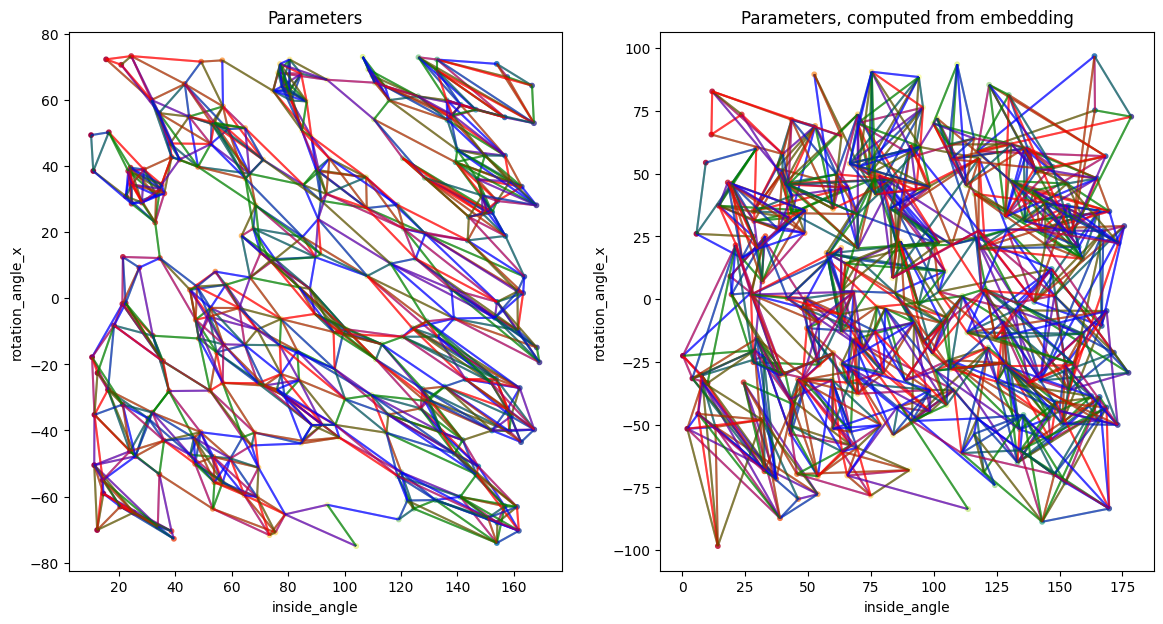

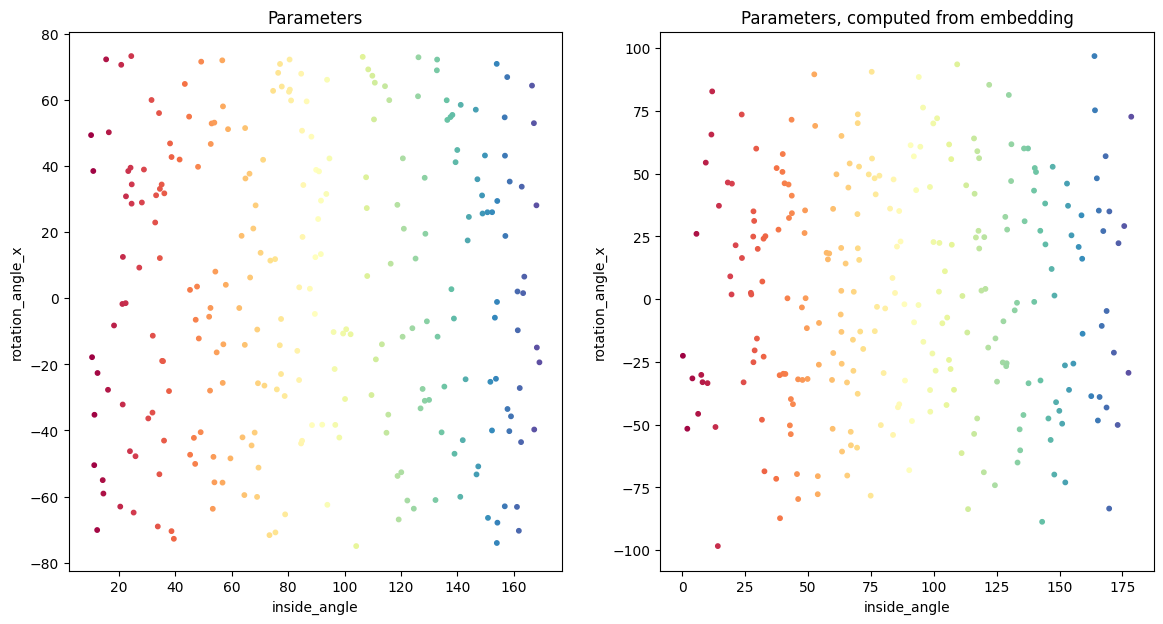

In [37]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [38]:
mcu_experiments = MCUexperiments(mcu_model)
k=4
seed=153
pieces = 8
test_size=50
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt, k=k, noise_level = 0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, seed=seed)

Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [ 36.76969972 -68.75989097], x_err = 0.05329724908241381
x_real = [ 28.7035755  -64.79909116]
Finding neighbors: 2 ms , optimization: 0 ms
-----------
x_opt  = [  8.78656893 -55.98466227], x_err = 0.04984620519336011
x_real = [ 12.21962552 -58.93880482]
Finding neighbors: 2 ms , optimization: 0 ms
-----------
x_opt  = [ 12.29377188 -45.91711124], x_err = 0.020419476220372164
x_real = [ 17.64314428 -57.18930132]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [ 13.50894848 -58.97456946], x_err = 0.052774295790614906
x_real = [ 17.71101422 -64.10328594]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [ 36.76955106 -68.75958748], x_err = 0.053290838193500556
x_real = [ 28.40830912 -74.84619902]
Finding neighbors: 2 ms , optimization: 0 ms
-----------
x_opt  = [ 36.76978105 -68.75980533], x_err = 0.05329603386556389
x_real = [ 29.45346807 -70.62135017]
Finding neighbors: 1 ms , optimizatio

In [32]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt, noise_level = 0, pieces_cnt=pieces, test_data_size=pieces, same_value=False, baseline=True, seed=seed)

-----------
x_opt  = [ 25.24524691 -64.83420825], x_err = 0.07383063787016422
x_real = [ 28.7035755  -64.79909116]
-----------
x_opt  = [ 14.52861054 -59.08533938], x_err = 0.08911311657249531
x_real = [ 12.21962552 -58.93880482]
-----------
x_opt  = [ 14.28768589 -55.02611497], x_err = 0.09144626556310659
x_real = [ 17.64314428 -57.18930132]
-----------
x_opt  = [ 20.50221064 -63.02789714], x_err = 0.07088277480720538
x_real = [ 17.71101422 -64.10328594]
-----------
x_opt  = [ 25.24524691 -64.83420825], x_err = 0.06802256854437637
x_real = [ 28.40830912 -74.84619902]
-----------
x_opt  = [ 25.24524691 -64.83420825], x_err = 0.06802926263403133
x_real = [ 29.45346807 -70.62135017]
-----------
x_opt  = [ 14.52861054 -59.08533938], x_err = 0.08911162675028494
x_real = [ 11.59321154 -59.25586866]
-----------
x_opt  = [ 14.52861054 -59.08533938], x_err = 0.09476795063001725
x_real = [ 17.58485599 -59.20383326]
errors0 = [2.16145536 1.44311564 2.0971615  1.74449777 1.97691388 2.63013823
 1.

In [41]:
data = {
    'interval_runs': interval_runs,
    'intervals': intervals,
    'interval_runs_base': interval_runs_base
}
with open('tmp_storage/orig_angle.pkl', 'wb') as f:
    pickle.dump(data, f)

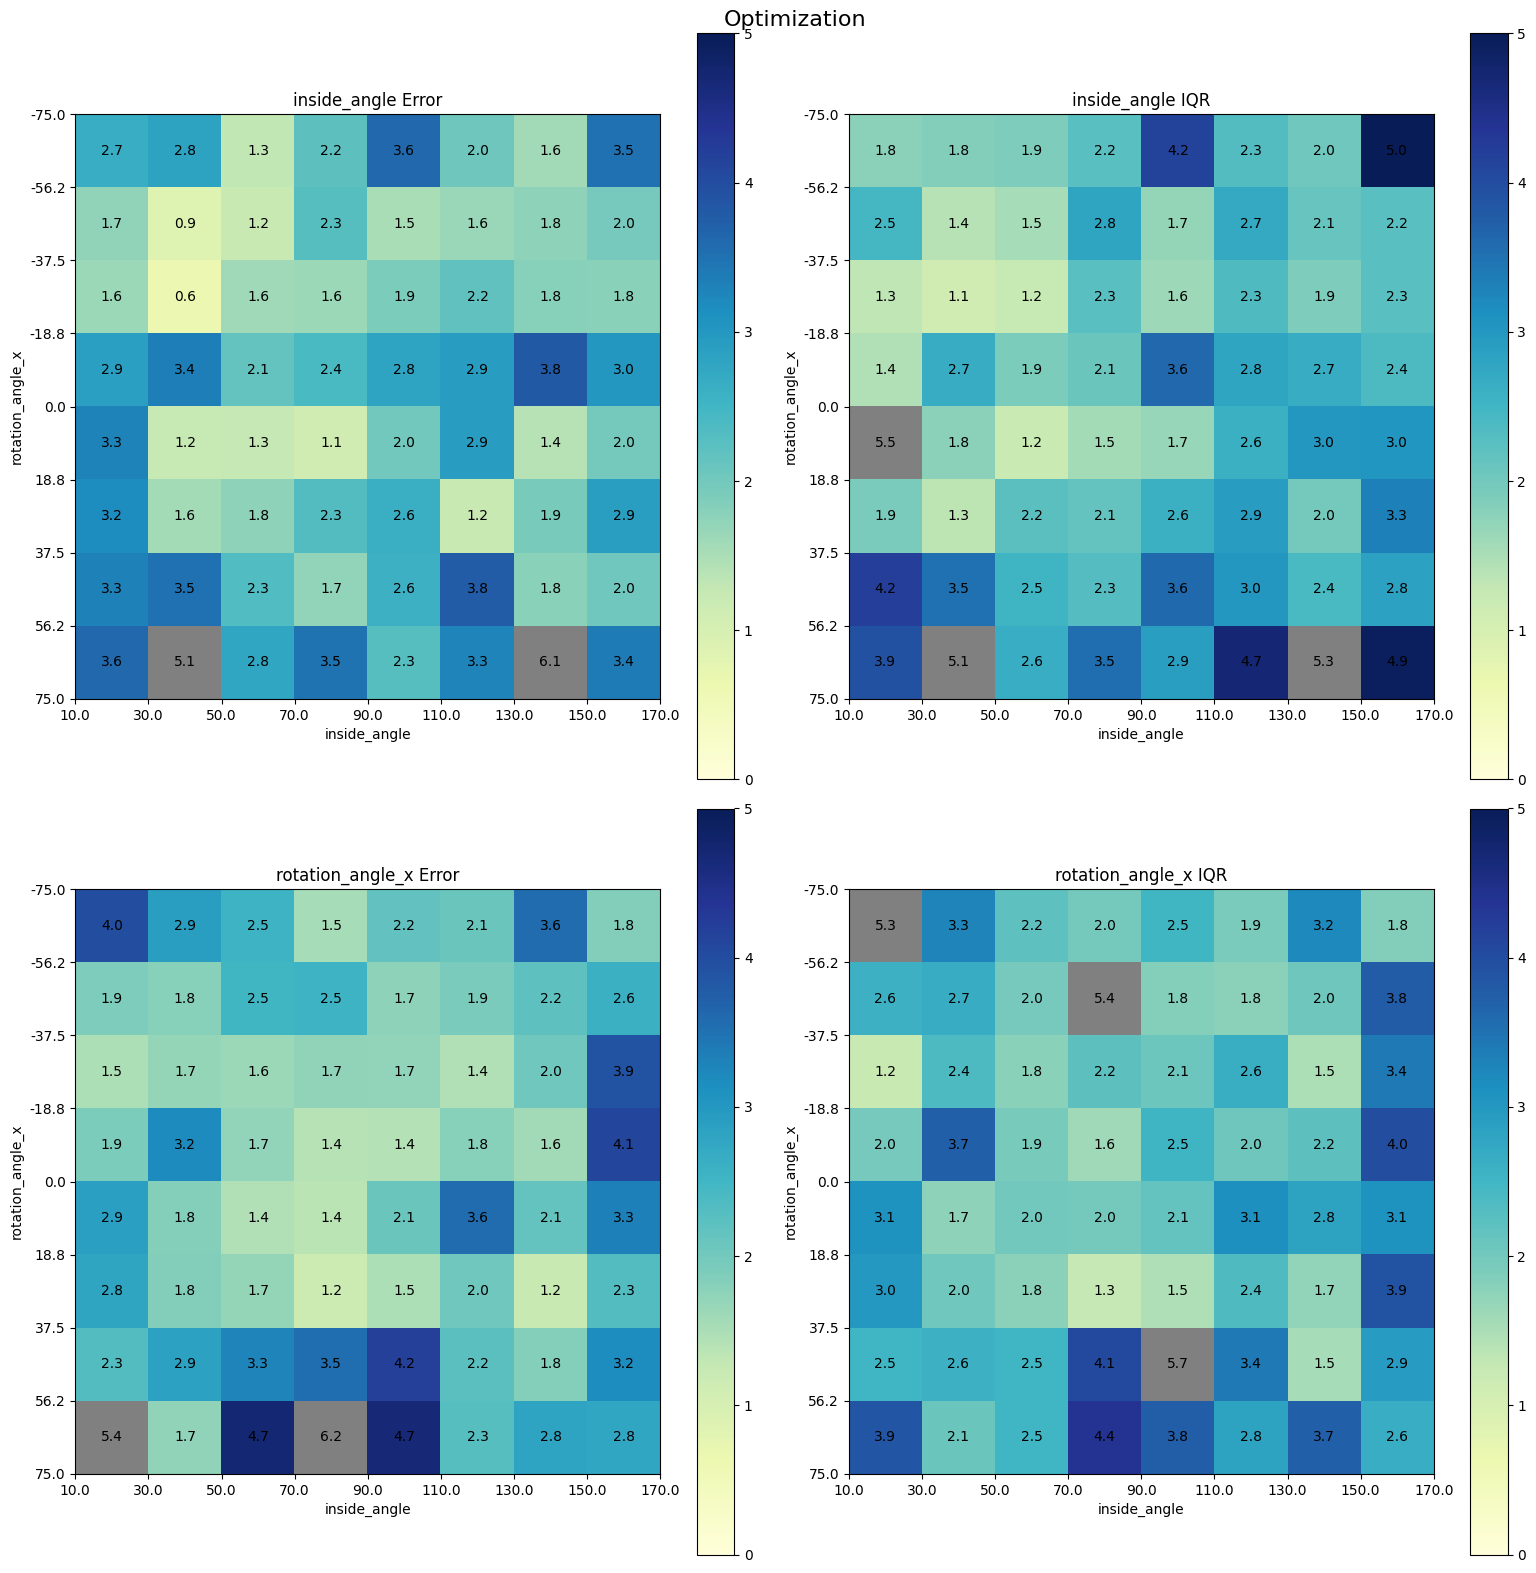

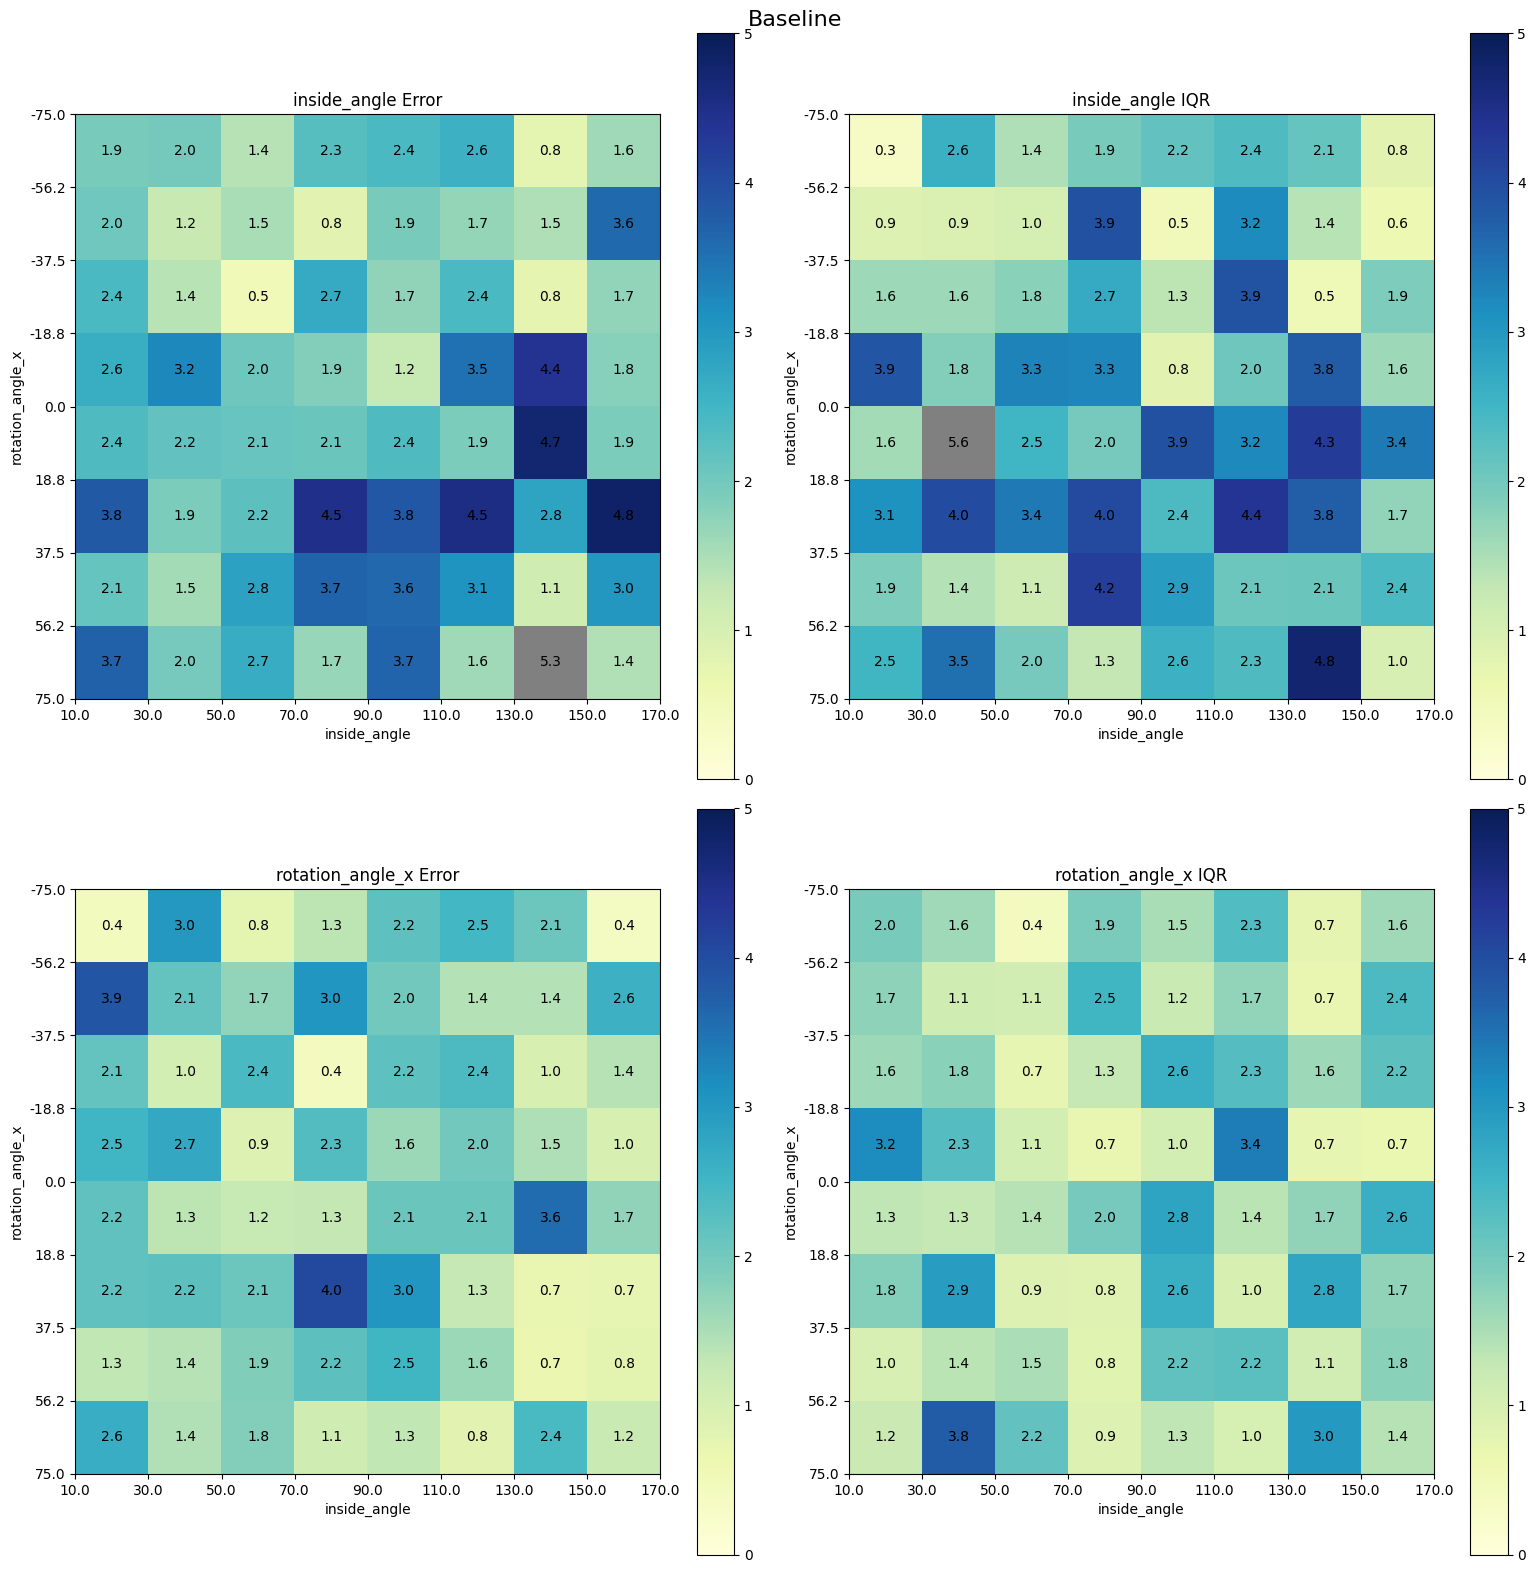

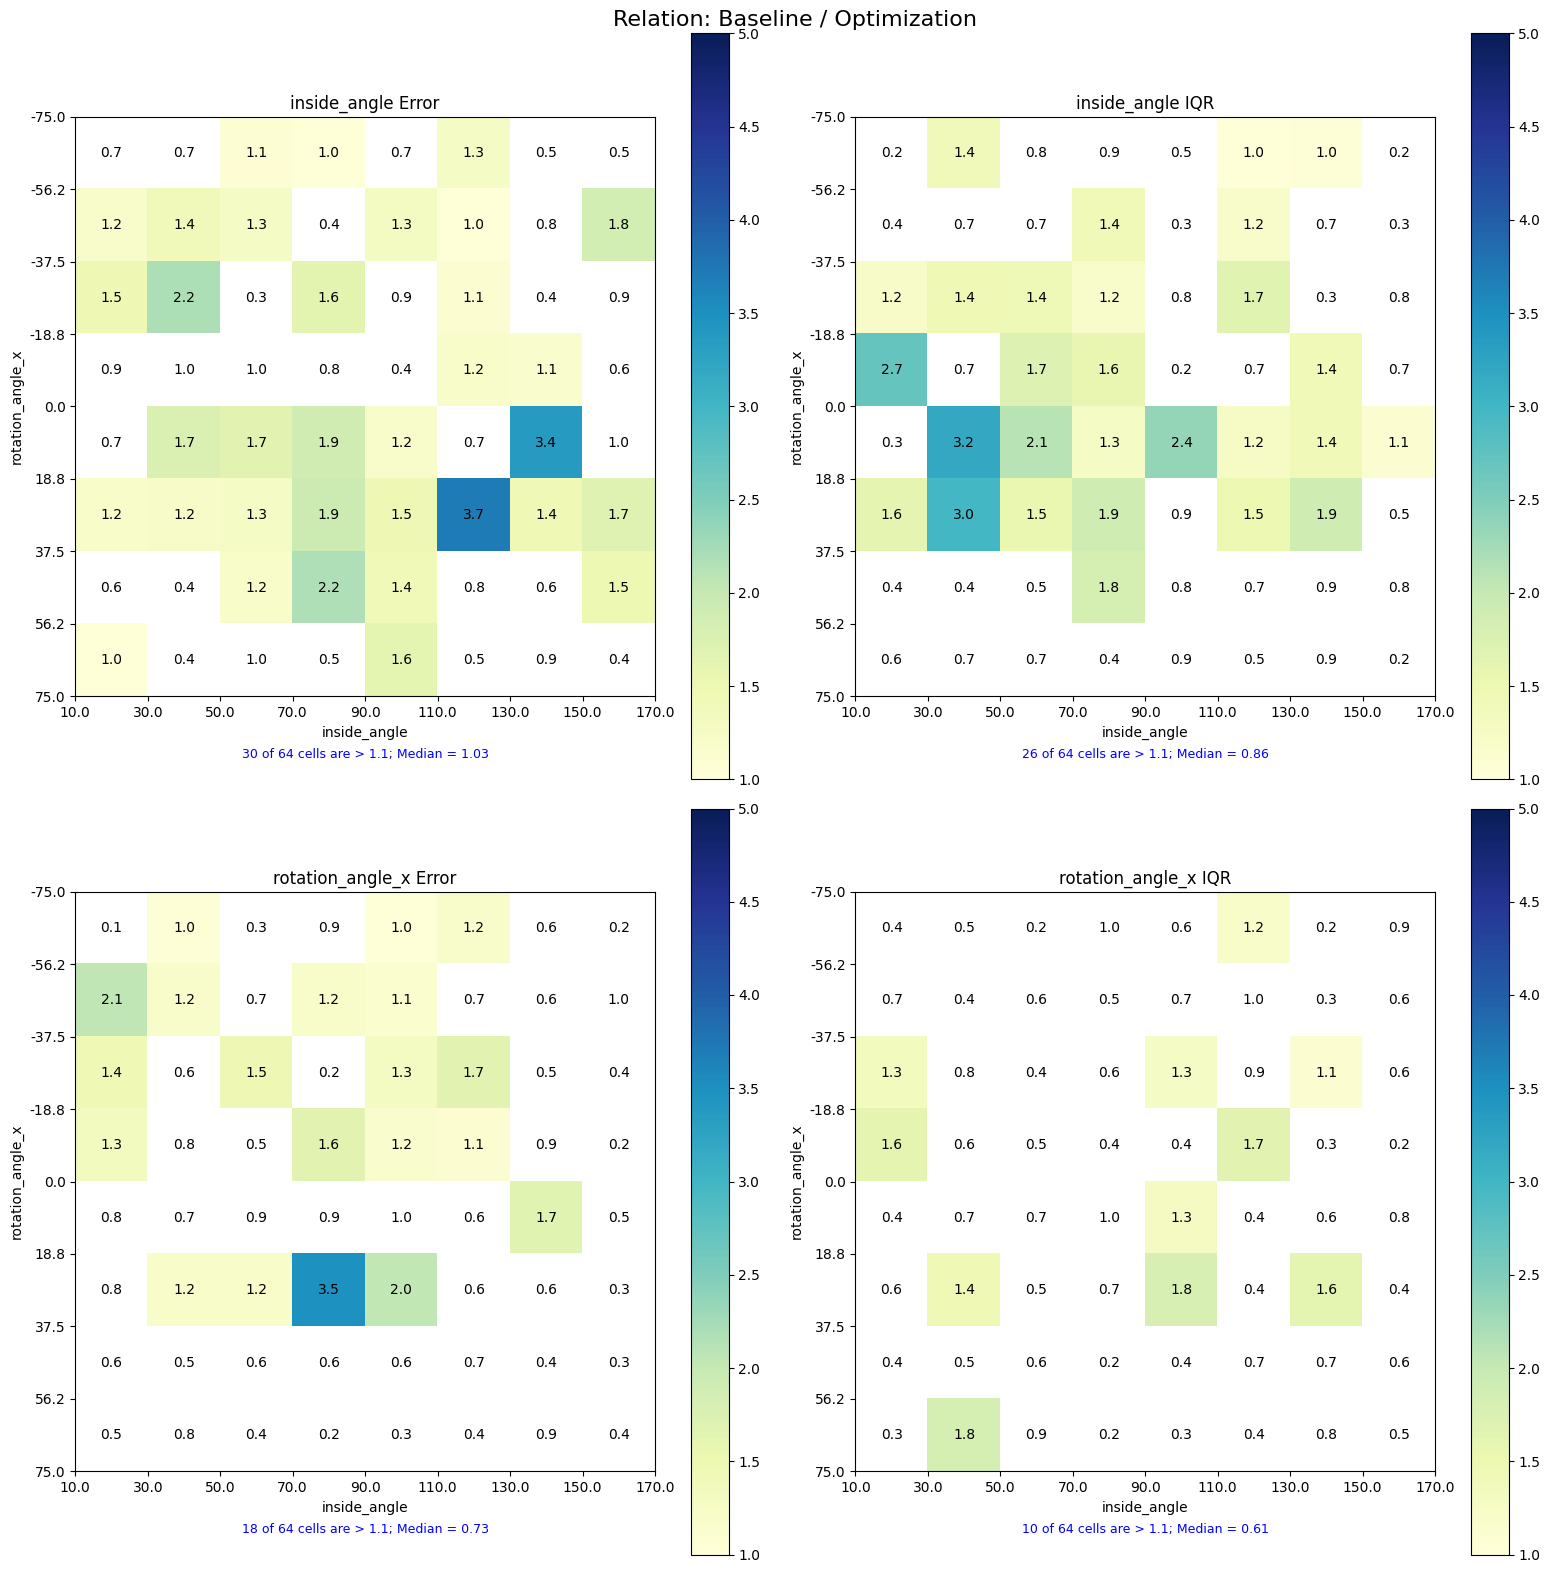

In [40]:
heatmap_lw = 0
heatmap_up=5
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/orig_angle_2d.png", title="Optimization", lw=heatmap_lw, up=heatmap_up)
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/orig_angle_2d_base.png", title="Baseline", lw=heatmap_lw, up=heatmap_up)
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/orig_angle_2d_rel.png", title="Relation: Baseline / Optimization", lw=1, up=5, count_greater_then=1.1)

4.9533121119665395 172.77679283685436 -76.0811989553345 80.17491201066572


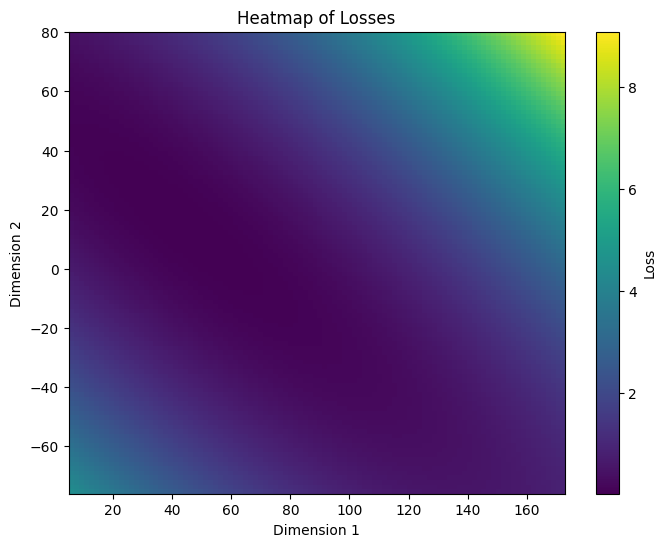

Finding neighbors: 1 ms , optimization: 168 ms
x_opt = [42.99762623 15.26214151], x_err = 0.015464333965537057
x_real = [45 15]
4.9533121119665395 172.77679283685436 -76.0811989553345 80.17491201066572


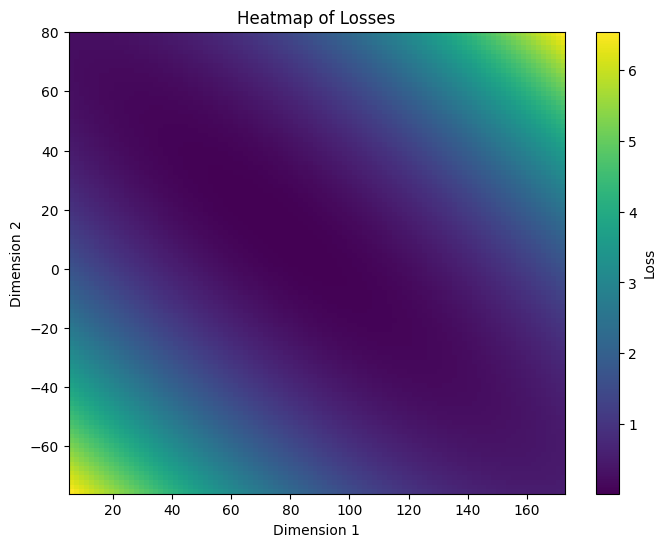

Finding neighbors: 1 ms , optimization: 174 ms
x_opt = [74.6247873  14.30616243], x_err = 0.01846552278795624
x_real = [70 15]


In [10]:
test_control_vars = np.array([[45, 15], [70, 15]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, simple_angles_gen.generate_angles_points,
                                                           noise_level=noise_level,
                                                           min_num_points=1000)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")